## Welcome to the Second Exercise Block

In this example, we will go over different examples presenting variations of
[Linear Regression](https://en.wikipedia.org/wiki/Linear_regression). This technique is a particularly important means of calibration/analysis relevant in every scientific discipline.

The goal is to identify a linear equation $\bar{y} = a \cdot x + b$ so that the sum of residuals *R* is minimized:<br />
<br />

$$ R = \sum_{i=1}^n \left(y_i - \bar{y}_i \right)^2 $$<br />

Although the calculation of the Slope $a$ and Intercept $b$ looks intricate, we only require the calculation of simple sum expression:
<br />
<br />
$$ a = \frac{n\sum_{i=1}^n x_iy_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n\sum_{i=1}^n x_i^2- \left( \sum_{i=1}^n x_i \right)^2} $$
<br />
$$ b = \frac{\sum_{i=1}^n y_i - a \sum_{i=1}^n x_i}{n} $$
<br />


Today we will work with a number of different exercises:

- Concentration determination using [infrared spectroscopy]()
- Correlation plots (theory vs. experiment) of the electrochemical potential of Anthraquinone derivatives

  (taken from [Phys.Chem.Chem.Phys. 2022, **24**, *16207 -- 16219*](https://pubs.rsc.org/en/content/articlehtml/2022/cp/d2cp01717b)\ )

- Linearization of oxygen diffusion data *via* an Arrhenius plot in a YSZ mineral

  (taken from [Phys.Chem.Chem.Phys. 2019, **21**, *25635 -- 25648*](https://pubs.rsc.org/en/content/articlelanding/2019/cp/c9cp04307a)\ )



## Exercise B.1 -- Calibration of Infrared or UV/Vis Spectroscopy

In quantitative spectroscopy we measure the (dimensionless) absorbance $A$ of a beam of light at a selected frequency/wavelength to determine the concentration $c$ of a sample. To do this, we first calibrate the device using solutions with known concentration.

In our exercise we compare the calibrations of two groups of students available in the files *ir_spectroscopy1.dat* and *ir_spectroscopy2.dat*.

From that we have to predict the concentration of our unknown sample measured at the absorption of $A_\mathrm{sample} = 0.753$.

Let's start by importing the respective files.


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Next, we:

- Load [NumPy](https://numpy.org/) and [Matplotlib](https://matplotlib.org/).
- Read the data from the files.
- Extract the x- and y-axis into suitable data arrays for concentration (c) and Absorbance (A).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt('spectroscopy1.dat')
data2 = np.loadtxt('spectroscopy2.dat')

c1 = data1[:, 0]
A1 = data1[:, 1]

c2 = data2[:, 0]
A2 = data2[:, 1]

Did we read the data correctly ... ?

Is the data even linear ... ?

It is always a good idea to have a look at the data before starting any analysis.

Let’s make a quick plot (without title, axis label,
etc.) for orientation.


Using *linestyle = '$~$ '* $~$and *marker='o'*$~$
we don't show lines but the individual data points.

Alternative [marker options](https://matplotlib.org/stable/api/markers_api.html) include: *'+','x', '.', '^', 'v', '*'*

Alternative [linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) include: *'-', '--','-.', ':'*

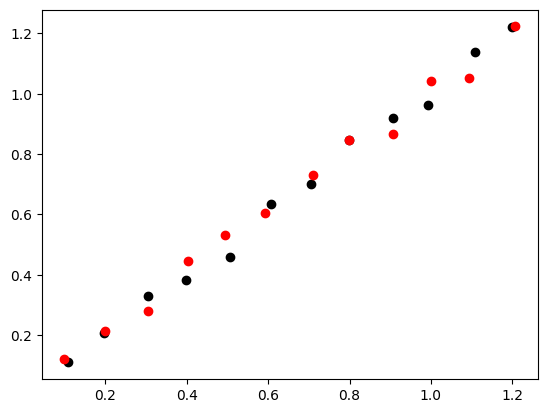

In [ ]:
plt.plot(c1, A1, color='k', marker='o', linestyle=' ')
plt.plot(c2, A2, color='r', marker='o', linestyle=' ')

## Linear Regression – Three Popular Options, But only One Winner

Let's fit the data to our selection and plot the regression. We have 3 popular options to carry out the linear fit.

<br />

- <ins>Method 1:</ins> The easiest method is using [NumPy](https://numpy.org/doc/stable/index.html)'s polynomial fit *np.polyift()*:
$$ y = a + bx + cx^2 + dx^3 + ... $$
  Choosing a degree of 1 yields a linear regression.

  No R² (coefficient of determination) available!

<br />

- <ins>Method 2:</ins> Linear regression of [scikit-learn](https://scikit-learn.org/stable/)

  Get's the job done, but rather complicated

<br />

- <ins>Method 3:</ins> Linear regression of [SciPy](https://scipy.org/)

  Needs to install one more module, but overall pretty straightforward.

  The recommended option!

<br />



In [ ]:
### METHOD 1: NumPy

# Polyfit can fit polynomials of any order
# By choosing a degree to 1 we have a linear regression
reg_np_1 = np.polyfit(c1, A1, 1)

print(f"np.polyfit slope    : {reg_np_1[0]: 7.4f}")
print(f"np.polyfit intercep : {reg_np_1[1]: 8.4e} l/mol")
print(f"np.R²               :  not available -- compute R² yourself :/\n")


### METHOD 2: scikit-learn (sklearn)
from sklearn.linear_model import LinearRegression

# In this case, it is easier to extract the data into seperate variables
x = c1.reshape(-1, 1)
y = A1

# Fit model
reg_sk1 = LinearRegression()
reg_sk1.fit(x, y)

print(f"sklearn slope       : {reg_sk1.coef_[0]: 7.4f}")
print(f"sklearn intercept   : {reg_sk1.intercept_: 8.4e} l/mol")
print(f"sklearn R²          : {reg_sk1.score(x, y): 7.4f}\n")


# METHOD 3: SciPy
from scipy.stats import linregress

reg_sp_1 = linregress(c1, A1)

print(f"scipy slope         : {reg_sp_1[0]: 7.4f} K")
print(f"scipy intercept     : {reg_sp_1[1]: 8.4e} l/mol")
print(f"scipy R²            : {reg_sp_1[2]**2: 7.4f}")


np.polyfit slope    :  1.0141
np.polyfit intercep : -2.6201e-03 l/mol
np.R²               :  not available -- compute R² yourself :/

sklearn slope       :  1.0141
sklearn intercept   : -2.6201e-03 l/mol
sklearn R²          :  0.9948

scipy slope         :  1.0141 K
scipy intercept     : -2.6201e-03 l/mol
scipy R²            :  0.9948


Either way we can easily include the regression in a plot.

To calculate the concentration for the unknown sample at Absorbance 0.753 we open the regression according to the x-variable:

<br />

$$ \bar{x} = \frac{y - b}{a}$$

<br />










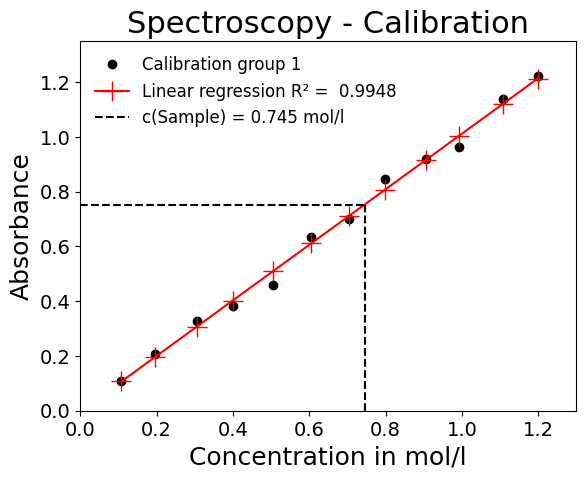

In [ ]:
# Get slope, intercept and coefficient of determination (R²)
# of data set 1 in a separate variable (optional)
# Remember: In scipy you have to calculate the square of R using **2
a1 = reg_sp_1[0]
b1 = reg_sp_1[1]
R1_squared = reg_sp_1[2]**2

abs_sample = 0.753
c_sample1 = (abs_sample - b1) / a1

# Plot the original data and the regression
plt.plot(c1, A1, color='k', marker='o', linestyle=' ', label ="Calibration group 1")
plt.plot(c1, a1*c1+b1, color='r', marker='+', markersize = 15, label =f"Linear regression R² = {R1_squared:7.4f} ")

# Add a horizontal and vertical line to show the unknown sample
plt.plot([0, c_sample1], [abs_sample, abs_sample], color='k', linestyle = '--', linewidth=1.5, label=f'c(Sample) = {c_sample1:5.3f} mol/l')
plt.plot([c_sample1, c_sample1], [0, abs_sample], color='k', linestyle = '--', linewidth=1.5)

# Set the x- and y-ranges
# The x-axis is now in days
plt.xlim(0.0, 1.3)
plt.ylim(0, 1.35)

# Add labels and title
plt.xlabel('Concentration in mol/l', fontsize=18)
plt.ylabel('Absorbance', fontsize=18)
plt.title('Spectroscopy - Calibration', fontsize=22)

# Increase font size of axis labels
plt.tick_params(axis='both', labelsize=14)

# Show a grid overlay (optional) and the legend
#plt.grid(True)
plt.legend(loc='upper left', frameon = False, fontsize=12)

# Plot the plot :)
plt.show()



To apply this to the second experiment we copy and adjust the workflow from above:



In [ ]:
# Since method 3 (SciPy) is the easiest
# We don't need to load linregress again
# because we already did so above

reg_sp_2 = linregress(c2, A2)

print(f"scipy slope         : {reg_sp_2[0]: 7.4f} K")
print(f"scipy intercept     : {reg_sp_2[1]: 8.4e}")
print(f"scipy R²            : {reg_sp_2[2]**2: 7.4f}")

# Get slope, intercept and coefficient of determination (R²)
# of data set 1 in a separate variable (optional)
a2 = reg_sp_2[0]
b2 = reg_sp_2[1]
R2_squared = reg_sp_2[2]**2

# Similarly, we can reuse the absorption of the sample
# abs_sample defined above
c_sample2 = (abs_sample - b2) / a2

scipy slope         :  0.9823 K
scipy intercept     :  2.4457e-02
scipy R²            :  0.9925


Let's bring it home by plotting both data series in a subplot.

You can do this :D


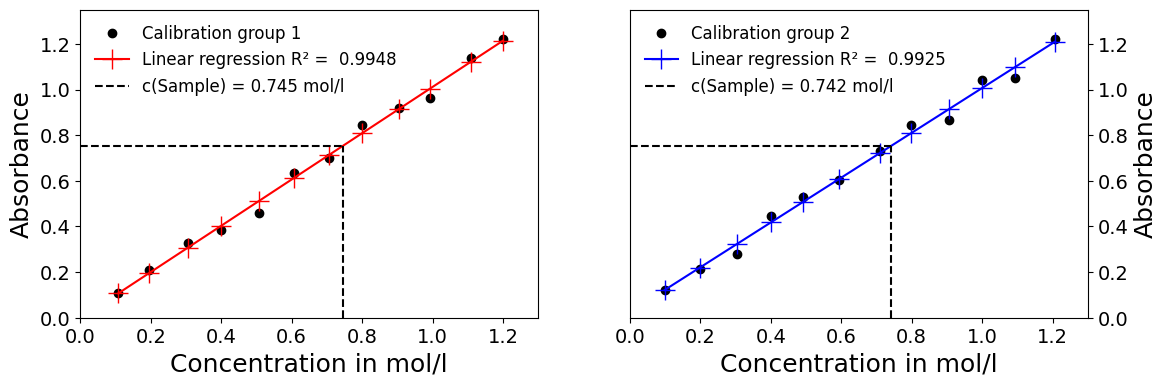

In [ ]:

# Set up the subplot -- one row, two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# Plot the original data and the regression
ax1.plot(c1, A1, color='k', marker='o', linestyle=' ', label ="Calibration group 1")
ax1.plot(c1, a1*c1+b1, color='r', marker='+', markersize = 15, label =f"Linear regression R² = {R1_squared:7.4f} ")

# Add a horizontal and vertical line to show the unknown sample
ax1.plot([0, c_sample1], [abs_sample, abs_sample], color='k', linestyle = '--', linewidth=1.5, label=f'c(Sample) = {c_sample1:4.3f} mol/l')
ax1.plot([c_sample1, c_sample1], [0, abs_sample], color='k', linestyle = '--', linewidth=1.5)

# Plot the original data and the regression
ax2.plot(c2, A2, color='k', marker='o', linestyle=' ', label ="Calibration group 2")
ax2.plot(c2, a2*c2+b2, color='b', marker='+', markersize = 15, label =f"Linear regression R² = {R2_squared:7.4f} ")

# Add a horizontal and vertical line to show the unknown sample
ax2.plot([0, c_sample2], [abs_sample, abs_sample], color='k', linestyle = '--', linewidth=1.5, label=f'c(Sample) = {c_sample2:4.3f} mol/l')
ax2.plot([c_sample2, c_sample2], [0, abs_sample], color='k', linestyle = '--', linewidth=1.5)

# Set the x- and y-ranges
# The x-axis is now in days
for i in [ax1, ax2]:
   i.set_xlim(0.0, 1.3)
   i.set_ylim(0, 1.35)
   i.set_xlabel('Concentration in mol/l', fontsize=18)
   i.set_ylabel('Absorbance', fontsize=18)
   i.legend(loc='upper left', frameon = False, fontsize=12)
   i.tick_params(axis='both', labelsize=14)

ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()

# Plot the plot :)
plt.show()



Finally, let's quickly make an overlap of the two linear regression plots

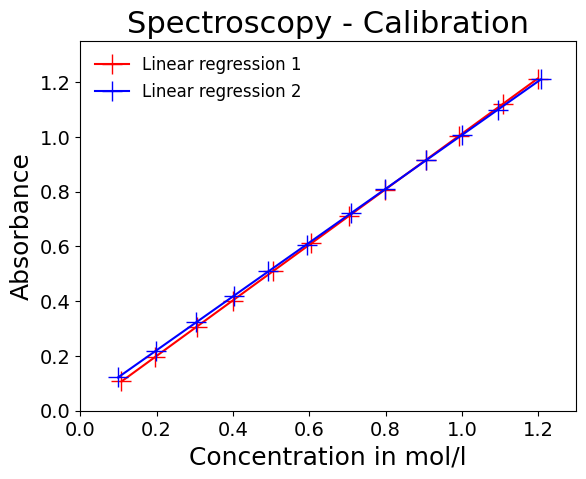

In [ ]:
plt.plot(c1, a1*c1+b1, color='r', marker = "+", markersize = 15, label =f"Linear regression 1")
plt.plot(c2, a2*c2+b2, color='b', marker = "+", markersize = 15, label =f"Linear regression 2 ")

# Set the x- and y-ranges
# The x-axis is now in days
plt.xlim(0.0, 1.3)
plt.ylim(0, 1.35)

# Add labels and title
plt.xlabel('Concentration in mol/l', fontsize=18)
plt.ylabel('Absorbance', fontsize=18)
plt.title('Spectroscopy - Calibration', fontsize=22)

# Increase font size of axis labels
plt.tick_params(axis='both', labelsize=14)

# Show a grid overlay (optional) and the legend
#plt.grid(True)
plt.legend(loc='upper left', frameon = False, fontsize=12)

# Plot the plot :)
plt.show()

